In [57]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pylab as plt
%matplotlib inline
#from sklearn.datasets.samples_generator import make_regression
from sklearn.datasets import make_regression
from sklearn.datasets.samples_generator import make_classification
from sklearn.datasets.samples_generator import make_blobs

from sklearn.datasets import make_gaussian_quantiles

from sklearn.model_selection import train_test_split
# 评价
from sklearn import metrics
# 交叉验证
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

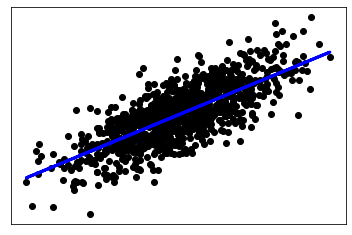

In [74]:

# 线性可分回归数据
# X为样本特征，y为样本输出， coef为回归系数，共1000个样本，每个样本1个特征
X, y, coef =make_regression(n_samples=1000, n_features=1,noise=10, coef=True)
# 画图
plt.scatter(X, y,  color='black')
plt.plot(X, X*coef, color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [75]:
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression()

In [76]:
linreg.coef_,linreg.intercept_

(array([11.36695119]), 0.04915462285969835)

In [77]:
np.mean(y)

0.012241126464684953

In [38]:
sum(X[:,0]),np.mean(X[:,0])

(27.779183060254773, 0.027779183060254713)

In [91]:
y

array([-2.52948538e+01,  2.33894128e+01,  8.79466732e+00, -4.09676611e+00,
        1.18102685e+01,  5.59293168e+00,  4.22797512e+00, -5.44327350e+00,
       -6.21608815e-01,  2.90206678e+01,  5.90772373e+00, -1.60060870e+01,
       -2.86416402e+01, -1.59206909e+01,  2.84405775e+00, -1.58664761e+01,
        1.37900114e+01,  1.50735188e+01,  9.43644981e+00, -1.93958272e+01,
        9.88293970e+00,  1.86863710e+01,  1.67247337e+01, -6.41086495e+00,
        1.87213501e+01, -1.61652222e+01,  1.44781206e+01,  5.94504138e-01,
       -2.19789600e+00,  1.55188814e+01,  7.38658603e+00, -2.57562804e+01,
        3.31568851e+01, -2.93026698e+00,  1.53865320e+01,  1.89647273e+01,
       -3.24465044e+00,  9.41466841e+00, -2.16390024e+01, -7.56219540e+00,
        4.53913678e+00, -2.95743079e+01, -5.28499449e+00, -5.35004577e+00,
       -1.84095786e+01, -8.76368601e+00, -1.84870709e+01, -4.18314266e-01,
       -1.32385868e+01,  8.80712117e+00,  8.95419121e+00,  1.37085503e+01,
       -2.95651472e+01,  

$$w_i$$

In [109]:
x2 = [55, 71, 68, 87, 101, 87, 75, 78, 93, 73]
y2 = [91, 101, 87, 109, 129, 98, 95, 101, 104, 93]
y2 = [k * 3 for k in y2]

In [110]:
y2

[273, 303, 261, 327, 387, 294, 285, 303, 312, 279]

In [111]:

def cal_lsm2(X, y):
    # 求x均值
    x_mean = np.mean(X)
    x_sums = sum(X)
    y_mean = np.mean(y)
    numerator = 0
    denominator = 0
    size = len(X)
    x_cdot_y = 0
    x_cdot_x = 0.0
    x_sums = 0
    y_sums = 0
    # 第一步：计算x[i],y[i]
    for i in range(size):
        x_cdot_y += X[i] * y[i]
        x_cdot_x += X[i] * X[i]
        x_sums += X[i]
        y_sums += y[i]
    
    # 计算斜率
    return (size * x_cdot_y - x_sums * y_sums)/(size * x_cdot_x - x_sums * x_sums)
import time
t1 = time.time()
for i in range(10):
    v = cal_lsm2(X[:,0],y)
    print(v)
print(time.time() - t1)

11.366951187799883
11.366951187799883
11.366951187799883
11.366951187799883
11.366951187799883
11.366951187799883
11.366951187799883
11.366951187799883
11.366951187799883
11.366951187799883
0.01844477653503418


In [83]:
X[:,0]

array([-1.99124144e+00,  8.07650260e-01, -4.54745161e-01,  4.73103555e-01,
       -2.33352866e-01, -8.05699282e-01, -5.44227559e-01, -4.39682085e-01,
        8.96562870e-01,  9.43546263e-01,  3.69434277e-01, -1.18077207e+00,
       -2.53064430e+00, -1.71799346e+00,  5.26710095e-01, -1.94404359e+00,
        1.29906574e+00, -2.07889411e-01,  1.38535873e+00, -1.08616492e+00,
        1.66231095e+00,  1.30833445e+00,  1.26596958e-01, -1.31977057e-01,
        1.07695251e+00, -8.64574527e-02,  1.26404185e+00, -3.75765698e-01,
        1.49275654e+00, -1.10159548e-01,  4.45332257e-01, -1.25223286e+00,
        1.20451622e+00,  5.14777546e-01,  1.61160421e+00,  9.26078863e-01,
        1.39802373e-02,  2.74758719e-01, -1.55660823e+00, -1.29900532e+00,
        1.11733274e+00, -5.17800618e-01,  5.16211940e-01,  1.60716532e-01,
       -2.12276761e-01, -1.40856092e-01,  1.12039057e-01,  6.79758659e-01,
       -1.09008213e+00,  2.29986010e-02,  1.44747704e+00, -8.16870406e-02,
       -4.13124421e-01,  

In [99]:
def ols_algebra(x, y):
    n = len(x)
    w1 = (n*sum(x*y) - sum(x)*sum(y))/(n*sum(x*x) - sum(x)*sum(x))
    #w0 = (sum(x*x)*sum(y) - sum(x)*sum(x*y))/(n*sum(x*x)-sum(x)*sum(x))
    return w1

t1 = time.time()
for i in range(10000):
    v = ols_algebra(X[:,0],y)
print(time.time() - t1)

8.256464719772339


In [70]:
np.array(x2)

array([ 55,  71,  68,  87, 101,  87,  75,  78,  93,  73])

In [72]:
y[:,0]

TypeError: list indices must be integers or slices, not tuple

[91, 101, 87, 109, 129, 98, 95, 101, 104, 93]